In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from keras.optimizers import Adam, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical, plot_model

import tensorflow as tf
import random as rn

import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
print(os.listdir('/content/drive/MyDrive/collar datasets/flowers'))

['rose', 'dandelion', 'sunflower', 'tulip', 'daisy']


In [ ]:
X = []
Z = []

flower_rose = '/content/drive/MyDrive/collar datasets/flowers/rose'
flower_dandelion = '/content/drive/MyDrive/collar datasets/flowers/dandelion'
flower_sunflower = '/content/drive/MyDrive/collar datasets/flowers/sunflower'
flower_tulip = '/content/drive/MyDrive/collar datasets/flowers/tulip'
flower_daisy = '/content/drive/MyDrive/collar datasets/flowers/daisy'

In [ ]:
def assign_label(img, flower_type):
  return flower_type

In [ ]:
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR,img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150,150))

    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
make_train_data('Daisy', flower_daisy)
print(len(X))

100%|██████████| 764/764 [00:06<00:00, 125.43it/s]

764


In [ ]:
make_train_data('Sunflower', flower_sunflower)
print(len(X))

100%|██████████| 763/763 [00:08<00:00, 89.64it/s] 

1527


In [ ]:
make_train_data('Tulip', flower_tulip)
print(len(X))

100%|██████████| 984/984 [00:09<00:00, 108.34it/s]

2511


In [ ]:
make_train_data('Dandelion', flower_dandelion)
print(len(X))

100%|██████████| 1052/1052 [00:09<00:00, 107.09it/s]

3563


In [ ]:
make_train_data('Daisy', flower_daisy)
print(len(X))

100%|██████████| 764/764 [00:04<00:00, 186.28it/s]

4327


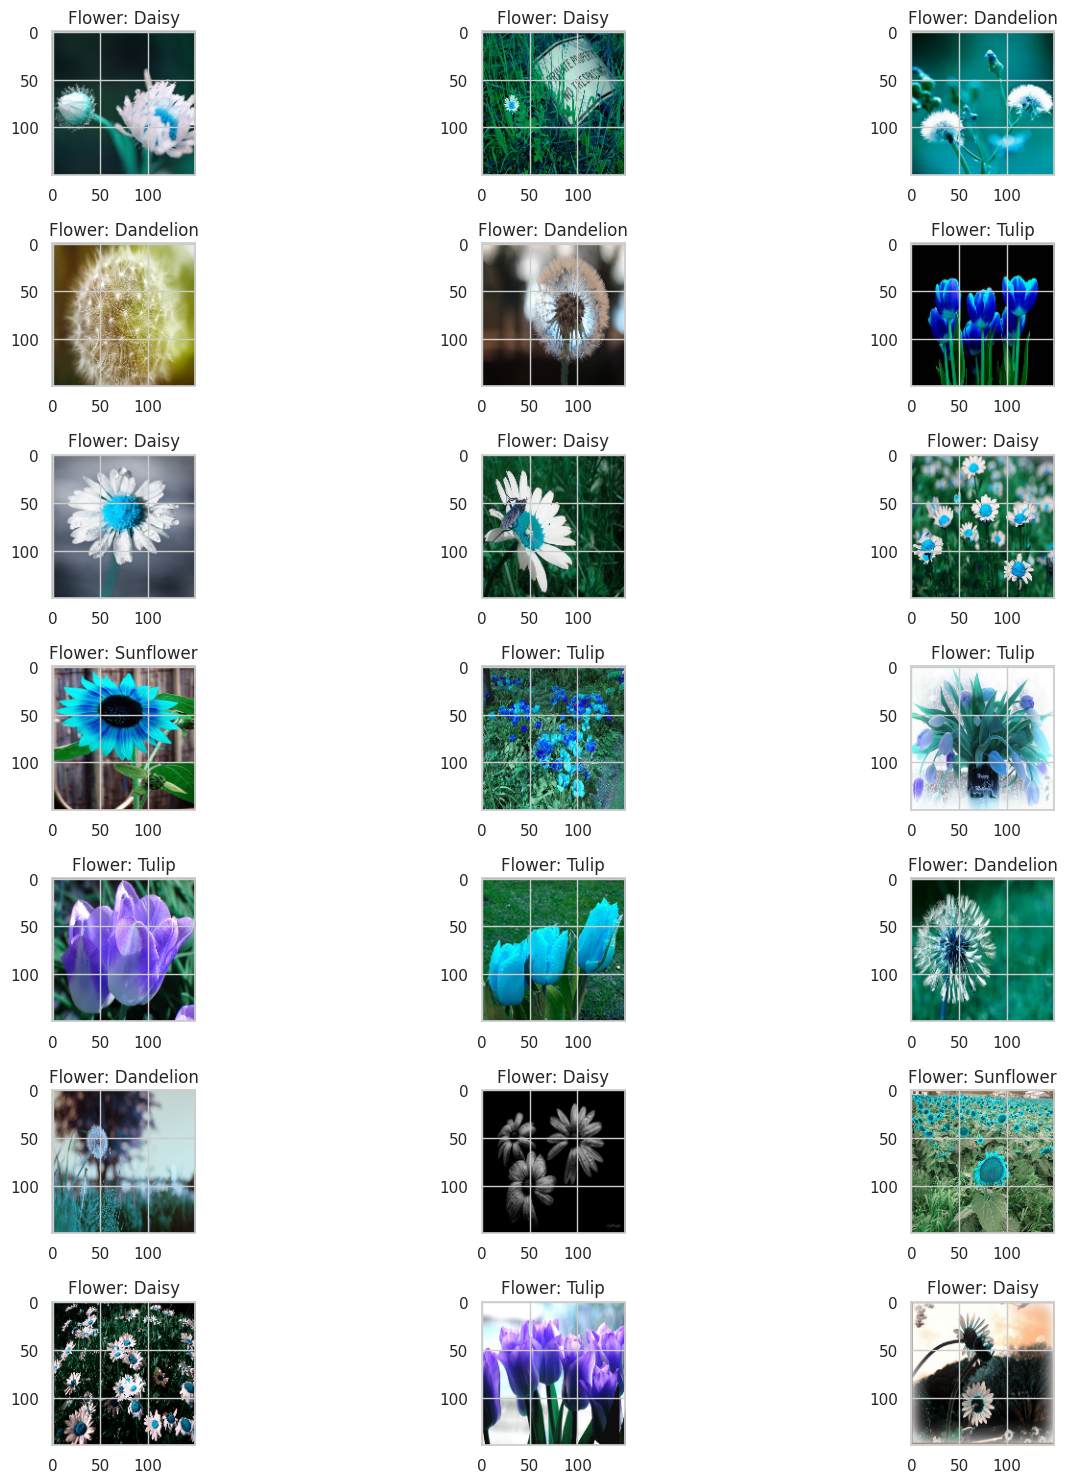

In [ ]:
f,ax = plt.subplots(7,3)
f.set_size_inches(15,15)
for i in range(7):
    for j in range(3):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Flower: " + Z[l])


plt.tight_layout()

In [ ]:
LE = LabelEncoder()
Y = LE.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X = X/255

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3461, 150, 150, 3)
x_test shape:  (866, 150, 150, 3)
y_train shape:  (3461, 5)
y_test shape:  (866, 5)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 18, 18, 96)      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

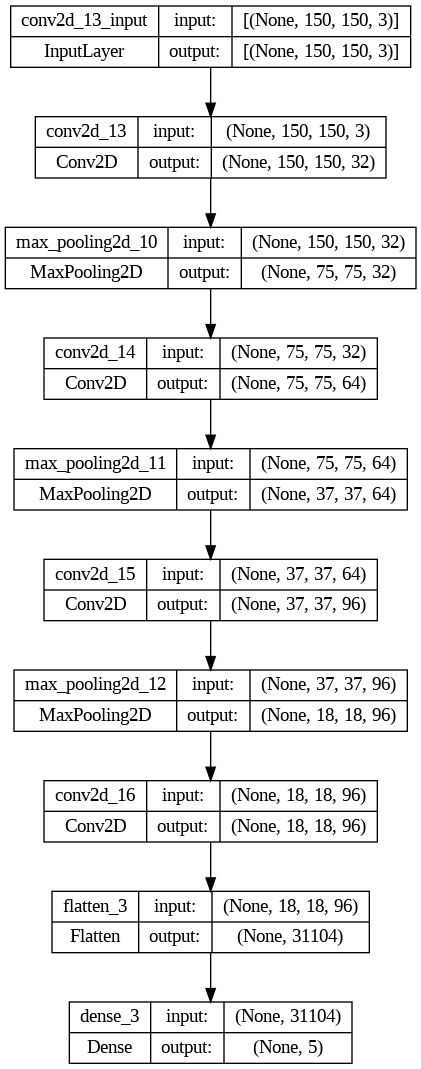

In [ ]:
plot_model(model, to_file='flowers.png', show_shapes=True)

In [ ]:
hestory = model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/50
109/109 [==============================] - 221s 2s/step - loss: 1.0375 - accuracy: 0.5591 - val_loss: 0.8967 - val_accuracy: 0.6467
Epoch 2/50
109/109 [==============================] - 218s 2s/step - loss: 0.8101 - accuracy: 0.6807 - val_loss: 0.8855 - val_accuracy: 0.6628
Epoch 3/50
109/109 [==============================] - 220s 2s/step - loss: 0.6511 - accuracy: 0.7544 - val_loss: 0.7670 - val_accuracy: 0.7390
Epoch 4/50
109/109 [==============================] - 221s 2s/step - loss: 0.5522 - accuracy: 0.7946 - val_loss: 0.6754 - val_accuracy: 0.7633
Epoch 5/50
109/109 [==============================] - 218s 2s/step - loss: 0.4329 - accuracy: 0.8362 - val_loss: 0.6608 - val_accuracy: 0.7771
Epoch 6/50
109/109 [==============================] - 210s 2s/step - loss: 0.3415 - accuracy: 0.8775 - val_loss: 0.7198 - val_accuracy: 0.7956
Epoch 7/50
109/109 [==============================] - 211s 2s/step - loss: 0.2508 - accuracy: 0.9075 - val_loss: 0.7285 - val_accuracy: 0.7956

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, batch_size = 32)
print('\n Test Accuracy : %.1f%%' % (100.0 * accuracy))

109/109 [==============================] - 58s 535ms/step - loss: 1.4694e-05 - accuracy: 1.0000

 Test Accuracy : 100.0%


In [ ]:
pred = model.predict(x_test)
predict_digits = np.argmax(pred, axis = 1)

28/28 [==============================] - 14s 513ms/step


In [ ]:
i = 0
right_class = []
wrong_class = []

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == predict_digits[i]):
        right_class.append(i)
    if(len(right_class) == 10):
        break

i = 0

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) != predict_digits[i]):
        wrong_class.append(i)
    if(len(wrong_class) == 10):
      break

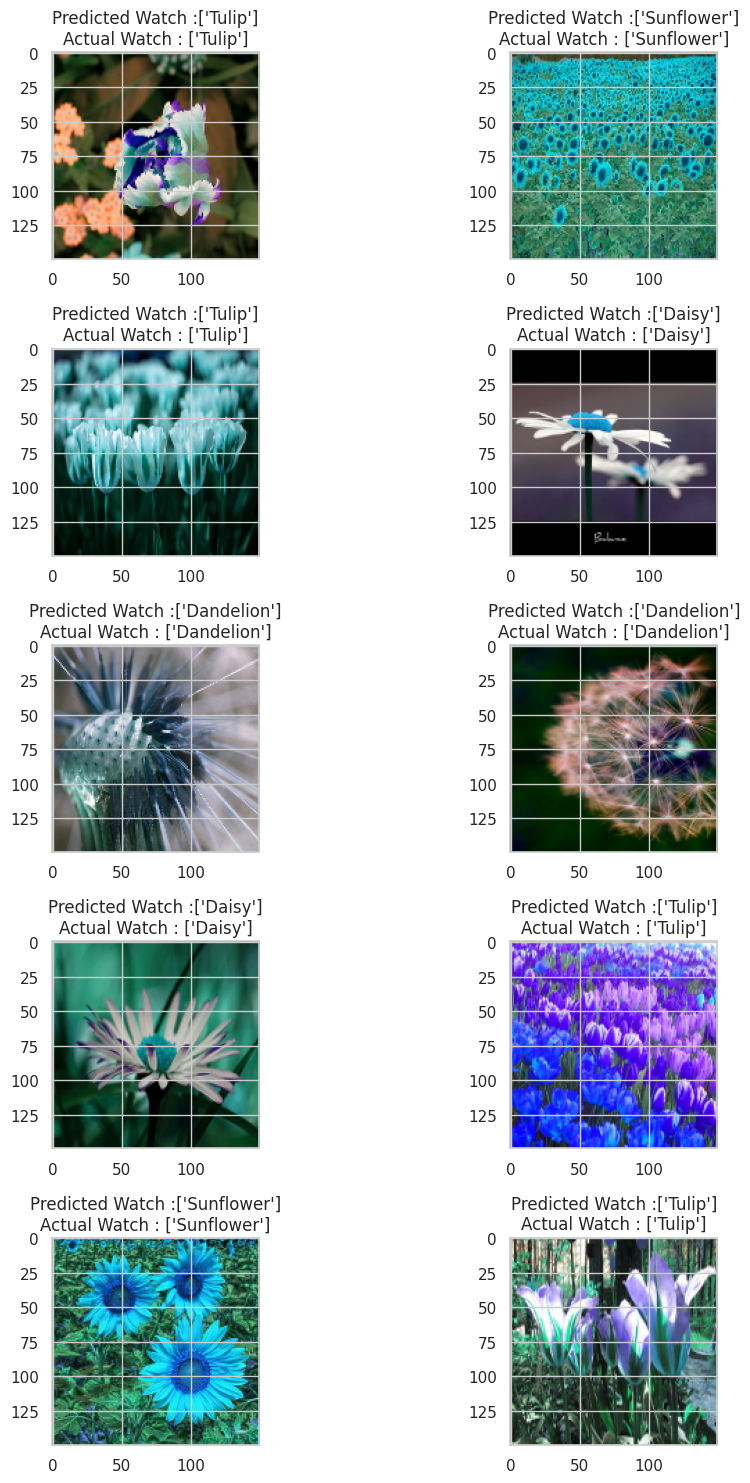

In [ ]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[right_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(LE.inverse_transform([predict_digits[right_class[count]]]))
                          +"\n"+"Actual Watch : "+str(LE.inverse_transform([np.argmax(y_test[right_class[count]])])))

        plt.tight_layout()
        count += 1

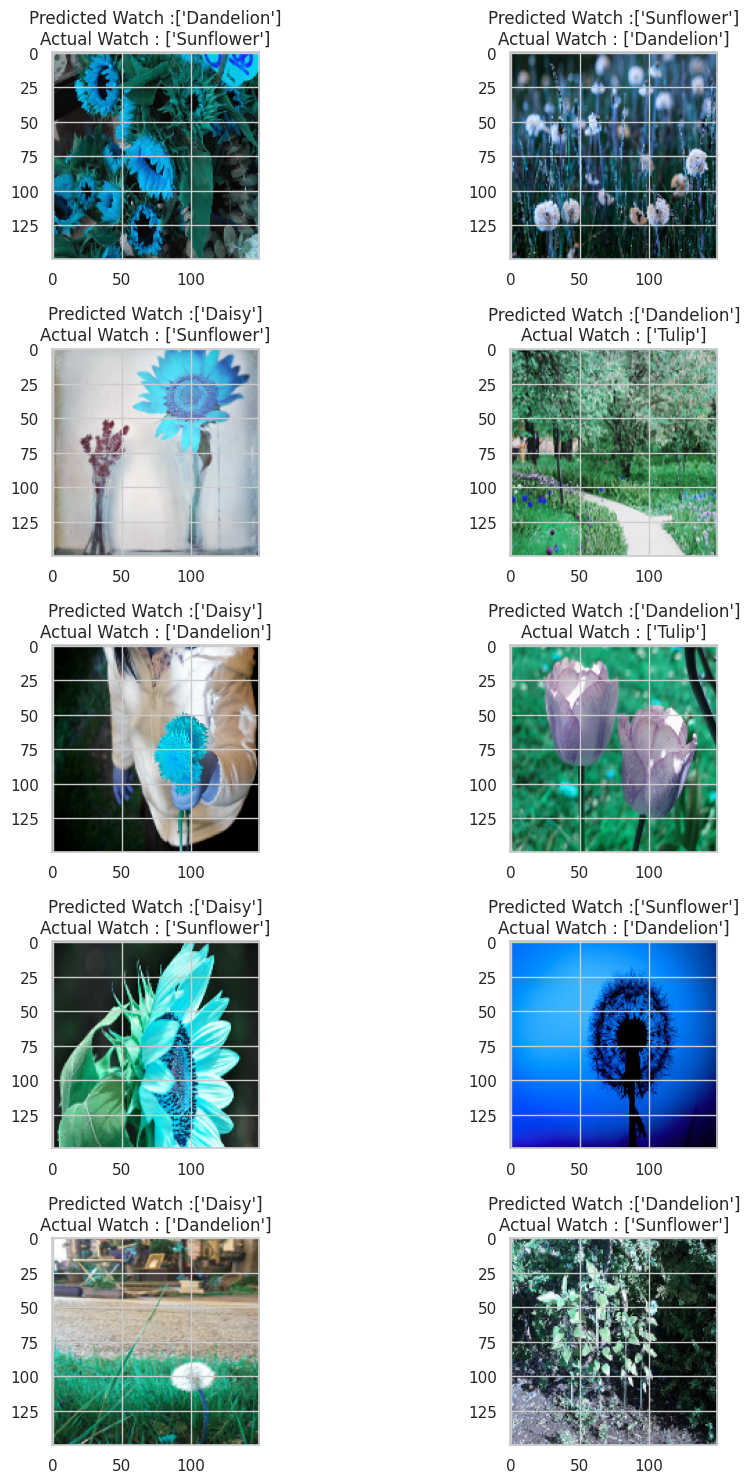

In [ ]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[wrong_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(LE.inverse_transform([predict_digits[wrong_class[count]]]))
                          +"\n"+"Actual Watch : "+str(LE.inverse_transform([np.argmax(y_test[wrong_class[count]])])))

        plt.tight_layout()
        count += 1